## Observations and Insights 

1. Capomulin and Ramicane showed the best performances out of the 10 drugs tested as suggested by the smallest mean tumor volume.
2. Capomulin and Ramicane have an higher number of measurements with respect to all the other drugs, probably because of the promising results. In fact, at 45 days of observation their performances seems comparable.
3. The heavier is the mouse the larger is the average tumor volume. In my opinion, although the correlation between these two factors is good (pearson correlation = 0.84) this is not a conclusive evidence. In fact the drug efficiency may be the same in the lighter and heavier mices. Further investigation are necessary before claiming this observation as conclusive. for example, an evaluation of the reduction of tumoral mass over the time. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#creating a variable that will be used throughout the script
ID = 'Mouse ID'
# Combine the data into a single dataset
mouse_study_df = mouse_metadata.merge(study_results, on=ID)
# Display the data table for preview

mouse_study_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
number_mice = len(mouse_study_df[ID].unique())
number_mice2 = len(mouse_metadata[ID].unique())
print(number_mice, number_mice2)


249 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoint = 'Timepoint'
duplicated_IDnumber = mouse_study_df[mouse_study_df.duplicated(subset=[ID,timepoint], keep =False)][ID].unique()
duplicated_IDnumber

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_ID = mouse_study_df[mouse_study_df.duplicated(subset=[ID,timepoint], keep =False)]
duplicated_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

idx_name = mouse_study_df.loc[ mouse_study_df[ID] == duplicated_ID[ID].unique()[0],: ].index
mouse_study_df.drop(index = idx_name, inplace=True)
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
n_mice_clean = len(mouse_study_df[ID].unique())
n_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
TUMOR = 'Tumor Volume (mm3)'
DRUG = 'Drug Regimen'
drug_group = mouse_study_df.groupby(DRUG)[TUMOR]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sum_stat_df = pd.DataFrame({'Mean Tumor Volume': drug_group.mean(),
                            'Median Tumor Volume': drug_group.median(),
                            'Variance Tumor Volume': drug_group.var(),
                            'Standard Deviation Tumor Volume': drug_group.std(),
                            'Standard Error Tumor Volume':drug_group.sem()})
sum_stat_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
sum_stat_df2 = drug_group.agg(['mean','median', 'var','std','sem'])
sum_stat_df2.columns=['Mean Tumor Volume','Median Tumor Volume','Variance Tumor Volume','Standard Deviation Tumor Volume','Standard Error Tumor Volume']
sum_stat_df2

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measures')

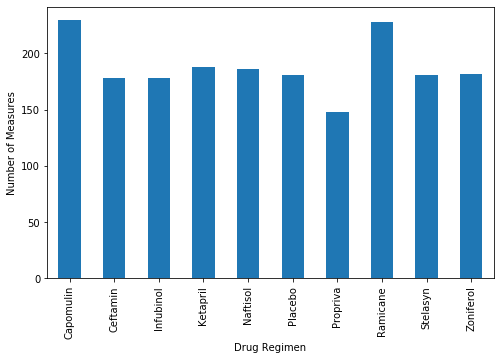

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
ax = drug_group.count().plot(kind='bar',figsize = (8,5))
ax.set_ylabel('Number of Measures')

Text(0, 0.5, 'Number of Measures')

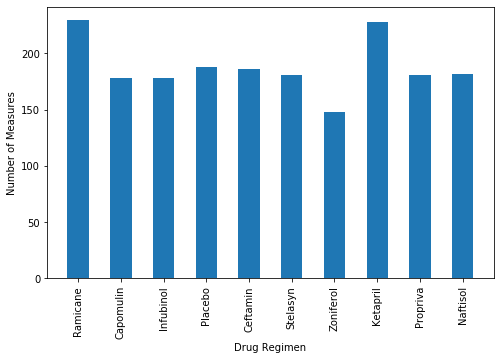

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot. 
drugs = mouse_study_df[DRUG].unique()
x_axis = np.arange(len(drugs))
plt.figure(figsize = (8,5))
plt.bar(x_axis, drug_group.count(),width = 0.5)
plt.xticks(x_axis, drugs, rotation="vertical")
plt.xlabel(DRUG)
plt.ylabel('Number of Measures')


Text(0.5, 1.0, 'Female to Male ratio in mouse population')

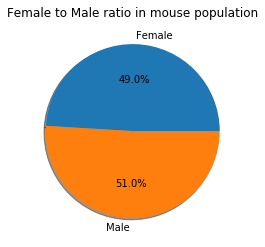

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
###MAKE PERCENTAGES
sex_pie = (mouse_study_df.groupby('Sex')[ID].count()).plot(kind='pie',autopct='%1.1f%%',shadow=True, startangle=0)
sex_pie.set_ylabel(' ')
sex_pie.set_title('Female to Male ratio in mouse population')

Text(0.5, 1.0, 'Female to Male ratio in mouse population')

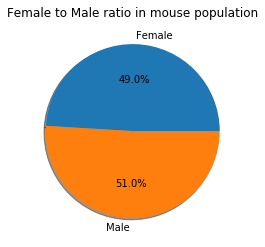

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_study_df.groupby('Sex')[ID].count(), labels = mouse_study_df.groupby('Sex')[ID].count().index,autopct='%1.1f%%',shadow = True,startangle=0)
plt.title('Female to Male ratio in mouse population')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_time = pd.DataFrame(mouse_study_df.groupby(ID)[timepoint].max()).reset_index().rename(columns={timepoint: 'max_timepoint'})
final_time
final_tumor_volume = pd.merge(mouse_study_df, final_time, on=ID)

final_tumor_volume = final_tumor_volume.loc[final_tumor_volume[timepoint] == final_tumor_volume ['max_timepoint']]
final_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_OI = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volume = [final_tumor_volume[final_tumor_volume[DRUG].isin([drug])] for drug in drugs_OI]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = []
volume_drug = []
for x in range(len(tumor_volume)):
    quartiles += [tumor_volume[x][TUMOR].quantile([.25,.5,.75])]
    volume_drug += [tumor_volume[x][TUMOR]]
quartiles = pd.DataFrame(quartiles, index = drugs_OI)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'IQR: \n{iqr}')

#calculating upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"LOWER BOUNDs: \n{lower_bound}")
print(f"UPPER BOUNDs: \n{upper_bound}")
   
# Determine outliers using upper and lower bounds
outlier_occupancy = []
for x in range(len(tumor_volume)):
    outlier_occupancy += [tumor_volume[x][TUMOR].loc[(tumor_volume[x][TUMOR] < lower_bound[x]) | (tumor_volume[x][TUMOR] > upper_bound[x])]]
    print(f"{drugs_OI[x]} has {len(outlier_occupancy[x])} outliers")    

IQR: 
Capomulin     7.781863
Ramicane      9.098537
Infubinol    11.477135
Ceftamin     15.577752
dtype: float64
LOWER BOUNDs: 
Capomulin    20.704562
Ramicane     17.912664
Infubinol    36.832905
Ceftamin     25.355450
dtype: float64
UPPER BOUNDs: 
Capomulin    51.832015
Ramicane     54.306811
Infubinol    82.741446
Ceftamin     87.666458
dtype: float64
Capomulin has 0 outliers
Ramicane has 0 outliers
Infubinol has 1 outliers
Ceftamin has 0 outliers


Text(0.5, 1.0, 'Final Tumor Volume by Drug')

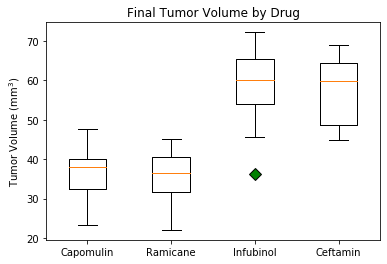

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Edit outliers on boxplot for visibility

fig, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g',markersize = 8, marker='D')

ax1.boxplot(volume_drug, flierprops=green_diamond)
ax1.set_ylabel('Tumor Volume (mm$^3$)')
plt.setp(ax1, xticks=[y + 1 for y in range(len(drugs_OI))], xticklabels=drugs_OI)
plt.title('Final Tumor Volume by Drug')

        



## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Efficacy on Subject y793')

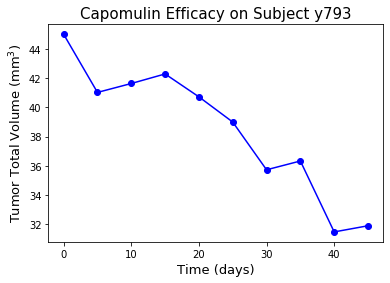

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
y793 = mouse_study_df.loc[mouse_study_df[ID]== 'y793']

fig, ax = plt.subplots()
ax.plot(y793[timepoint], y793[TUMOR], '-b', marker='o')
ax.set_ylabel('Tumor Total Volume (mm$^3$)',fontsize=(13))
ax.set_xlabel('Time (days)',fontsize=(13))
plt.title('Capomulin Efficacy on Subject y793', fontsize=(15))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Capomulin: Average Tumor Volume vs Weight ')

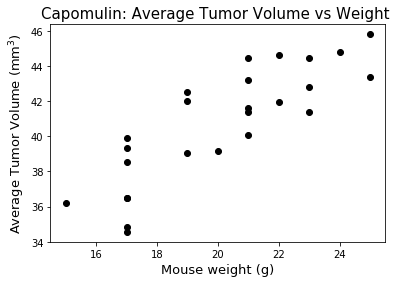

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
chosen_drug = 'Capomulin'
xlabel ='Mouse weight (g)'
ylabel ='Average Tumor Volume (mm$^3$)'
title = 'Capomulin: Average Tumor Volume vs Weight '

Capomulin_df = mouse_study_df.loc[mouse_study_df[DRUG]== chosen_drug ]

avg_TVW_df = Capomulin_df.groupby(ID)[TUMOR, 'Weight (g)'].mean()
avg_TVW_df
x_values = avg_TVW_df['Weight (g)']
y_values = avg_TVW_df[TUMOR]
fig, ax = plt.subplots()
ax.plot(x_values,y_values, ls = ' ', marker = 'o', ms = 6, color = 'black')
ax.set_xlabel(xlabel,fontsize=(13))
ax.set_ylabel(ylabel,fontsize=(13))
plt.title( title, fontsize =(15))

## Correlation and Regression

The r-squared is: 0.71 
The correlation coefficient is 0.84


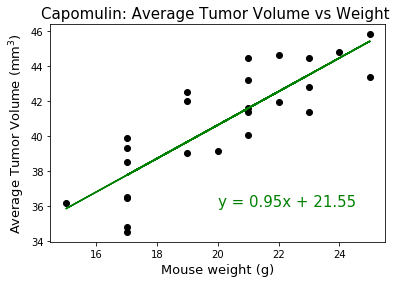

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#evaluation of the correlation
correlation = st.pearsonr(x_values,y_values)
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#creation of the scatter plot containing the data and the regression
plt.scatter(x_values,y_values, color = 'black')
plt.plot(x_values,regress_values,"g-")
#making the plot nicer 
plt.annotate(line_eq,(20,36),fontsize=15,color="green")
plt.xlabel(xlabel, fontsize=(13))
plt.ylabel(ylabel, fontsize=(13))
plt.title(title, fontsize=(15))
print(f"The r-squared is: {rvalue**2:.2f} \nThe correlation coefficient is {correlation[0]:.2f}")